# Isotropic linear elasticity

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from simmit import smartplus as sim
import os

In thermoelastic isotropic materials three parameters are required: 
      
1. The Young modulus $E$,
2. The Poisson ratio $\nu$,
3. The coefficient of thermal expansion $\alpha$.

The elastic stiffness tensor and the thermal expansion coefficients tensor are written in the Voigt notation formalism as

$$\boldsymbol{L}=\left(\begin{matrix} L_{1111} & L_{1122} & L_{1122} & 0 & 0 & 0 \\ L_{1122} & L_{1111} & L_{1122} & 0 & 0 & 0 \\ L_{1122} & L_{1122} & L_{1111} & 0 & 0 & 0 \\ 0 & 0 & 0 & L_{1212} & 0 & 0 \\ 0 & 0 & 0 & 0 & L_{1212} & 0 \\ 0 & 0 & 0 & 0 & 0 & L_{1212} \end{matrix}\right), \quad \boldsymbol{\alpha}=\left(\begin{matrix} \alpha & 0 & 0 \\ 0 & \alpha & 0 \\ 0 & 0 & \alpha \end{matrix}\right),$$

with 
$$L_{1111}=\frac{E(1-\nu)}{(1+\nu)(1-2\nu)}, \quad L_{1122}=\frac{E\nu}{(1+\nu)(1-2\nu)}, \quad L_{1212}=\frac{E}{2(1+\nu)}.$$

Details on the the elastic stiffness tensor of isotropic media can be found in Lai et al 2010. The tangent stiffness tensor in this case is $\boldsymbol{L}^t=\boldsymbol{L}$. Moreover, the increment of the elastic strain is given by

$$\Delta\varepsilon^{\textrm{el}}_{ij}=\Delta\varepsilon^{\textrm{tot}}_{ij}-\alpha\Delta T\delta_{ij},$$

where $\delta_{ij}$ implies the Kronecker delta operator. In the 1D case only one component of stress is computed, through the relation 

$$\sigma^{\textrm{fin}}_{11}=\sigma^{\textrm{init}}_{11}+E\Delta\varepsilon^{\textrm{el}}_{11}.$$

In the plane stress case only three components of stress are computed, through the relations 

$$\left(\begin{matrix} \sigma^{\textrm{fin}}_{11} \\ \sigma^{\textrm{fin}}_{22} \\ \sigma^{\textrm{fin}}_{12} \end{matrix}\right) =\left(\begin{matrix} \sigma^{\textrm{init}}_{11} \\ \sigma^{\textrm{init}}_{22} \\ \sigma^{\textrm{init}}_{12} \end{matrix}\right)+\frac{E}{1-\nu^2} \left(\begin{matrix} 1 & \nu & 0 \\ \nu & 1 & 0 \\ 0 & 0 & \frac{1-\nu}{2} \end{matrix}\right) \left(\begin{matrix} \Delta\varepsilon^{\textrm{el}}_{11} \\ \Delta\varepsilon^{\textrm{el}}_{22} \\ 2\Delta\varepsilon^{\textrm{el}}_{12} \end{matrix}\right).$$

In the generalized plane strain/3D analysis case the stress tensor is computed through the relation
$$\sigma^{\textrm{fin}}_{ij}=\sigma^{\textrm{init}}_{ij}+L_{ijkl}~\Delta\varepsilon^{\textrm{el}}_{kl}.$$

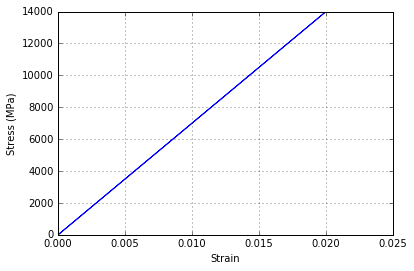

In [3]:
umat_name = 'ELISO' #This is the 5 character code for the elastic-isotropic subroutine
nstatev = 1 #The number of scalar variables required, only the initial temperature is stored here

rho = 1.12 #The density of the material 
c_p = 1.64 #The specific heat capacity

E = 700000.
nu = 0.2
alpha = 1.E-5

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

props = np.array([E, nu, alpha])

dir = os.path.dirname(os.path.realpath('__file__'))
pathfile = dir + '/path.txt'
outputfile = dir + '/results_ELISO.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, pathfile, outputfile)
outputfile = dir + '/results_ELISO_global-0.txt'

fig = plt.figure()

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)

plt.plot(e11,s11, c='blue')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')

plt.show()


Quick verification, we will take the slope of the stress-strain curve and find out if it does correspond to E. For that one can take the last value of s11 and e11

In [30]:
sigma_verif = np.amax(s11)
eps_verif1 = np.amax(e11)
eps_verif2 = np.amin(e22)

E_verif = sigma_verif/eps_verif1
nu_verif = -eps_verif2/eps_verif1

print(E_verif)
print(nu_verif)

70000.0
0.3
